Линейно разделимые данные

In [ ]:
import sklearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

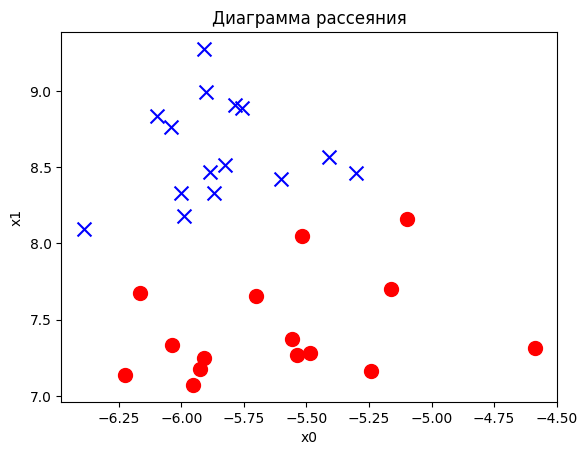

In [ ]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker = 'o', c = 'r', s = 100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
from sklearn import svm

In [ ]:
svm_linear = svm.SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [ ]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [ ]:
svm_linear.intercept_[0]

-64.25339880278436

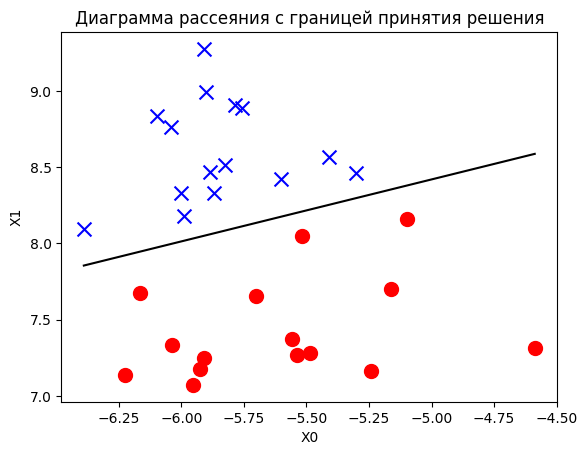

In [ ]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_linear.support_vectors_ # координаты опорных векторов

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
svm_linear.support_ # индексы опорных векторов в исходном наборе данных

array([ 0,  8, 29], dtype=int32)

In [ ]:
svm_linear.n_support_ # колличество опорных векторов

array([1, 2], dtype=int32)

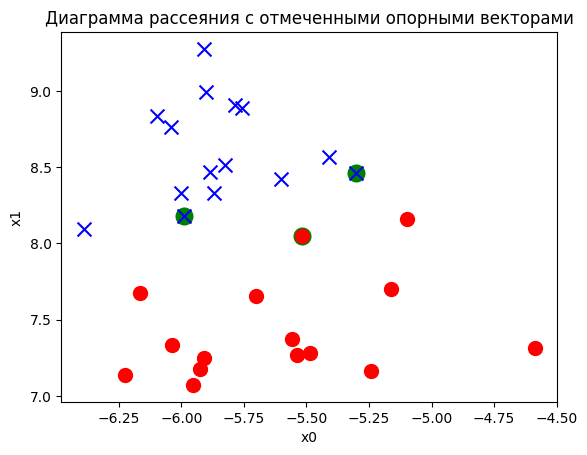

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

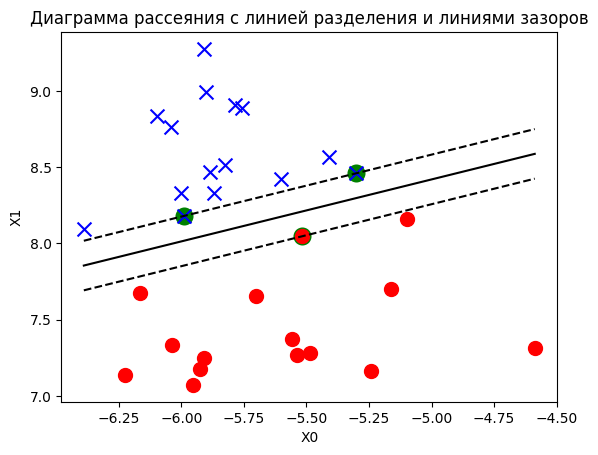

In [ ]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

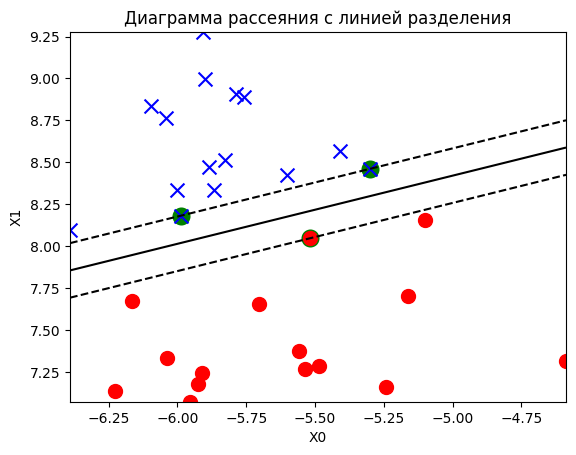

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = svm_linear.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new = [[-5.25, 7.5]]

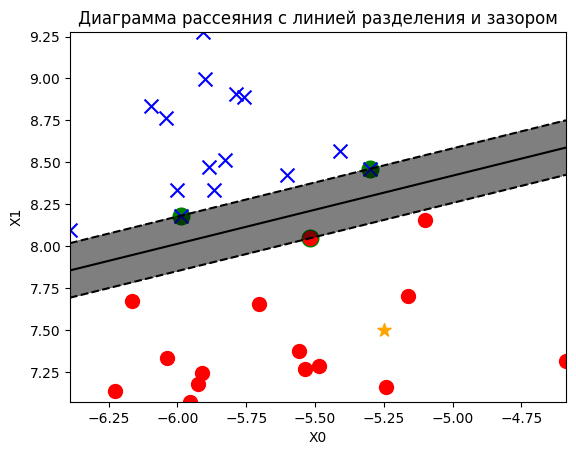

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [ ]:
svm_linear.predict(observation_new)

array([0])

Линейно неразделимые данные с зазором

In [ ]:
from sklearn.datasets import make_circles

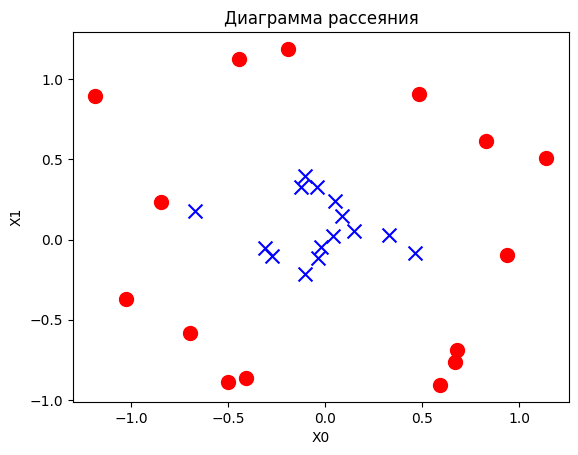

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_rbf = svm.SVC(kernel='rbf', C=100).fit(X, y)

In [ ]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

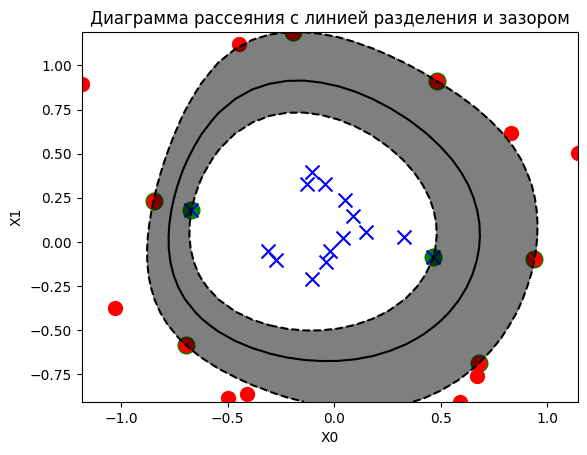

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
y_pred = svm_rbf.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

Данные без зазора

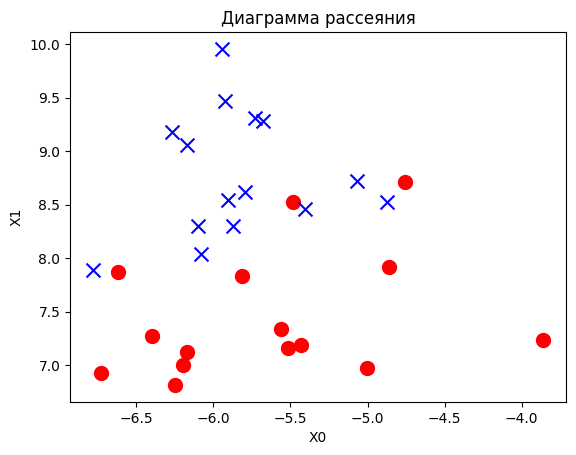

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_poly = svm.SVC(kernel='poly', degree=4, C=2).fit(X, y)

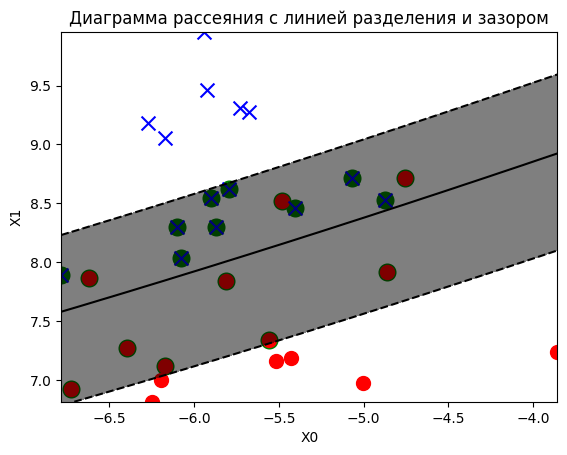

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [ ]:
y_pred = svm_poly.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

0.9

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[12,  3],
       [ 0, 15]])

1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации

In [ ]:
lini = svm.SVC(kernel='linear', C=1000).fit(X, y)

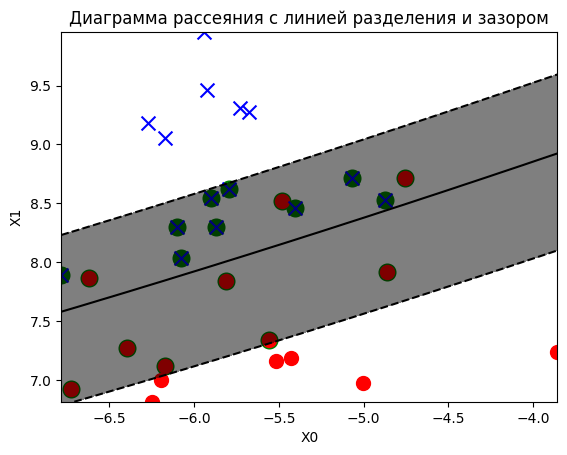

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
lini = svm.SVC(kernel='linear', C=1).fit(X, y)

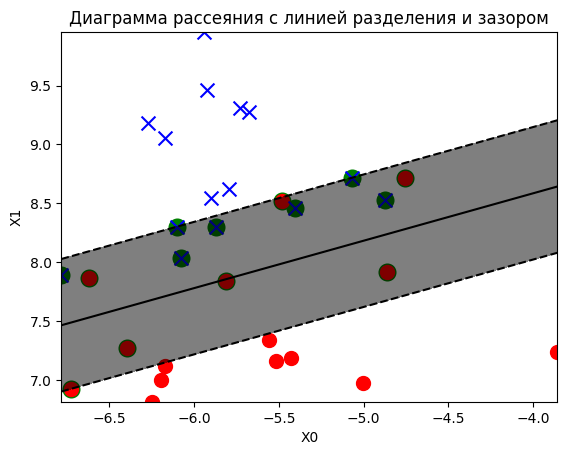

In [ ]:
plot_decision_regions(X, y, lini)

Можно управлять балансом зазора, используя гиперпараметр C: меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора, а чем больше C, тем более жёсткий зазор.

2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

In [ ]:
observation_new = [[-5.25, 9.0]] # новая точка (надо будет изменить)

In [ ]:
svm_linear = svm.SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

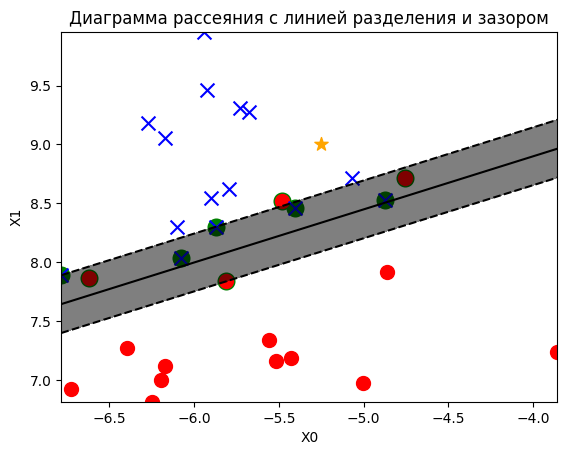

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.predict(observation_new)

array([1])

In [ ]:
observation_new_2 = [[-5.25, 8.25]] # новая точка внутри зазора (надо будет изменить)

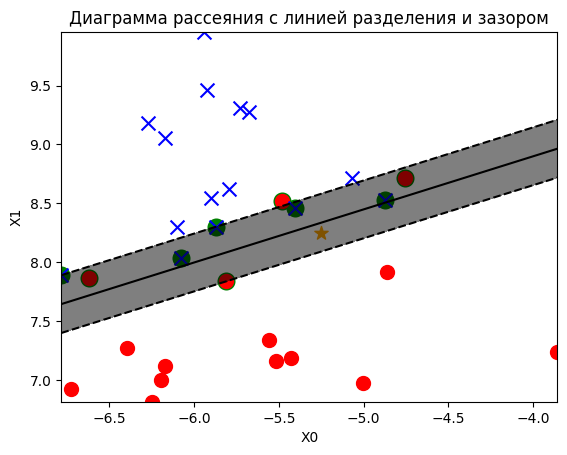

In [ ]:
plt.scatter(observation_new_2[0][0], observation_new_2[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.predict(observation_new_2)

array([0])

Вывод: Все предсказывается хорошо, расположение точки внутри зазора не является критическим.

3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

RBF ядро

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)
svm_rbf = svm.SVC(kernel='rbf', C=100).fit(X, y)

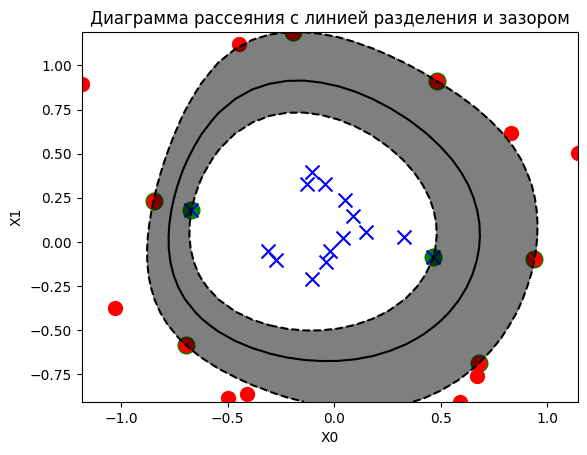

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
y_pred = svm_rbf.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

Linear ядро

In [ ]:
svm_rbf = svm.SVC(kernel='linear', C=100).fit(X, y)

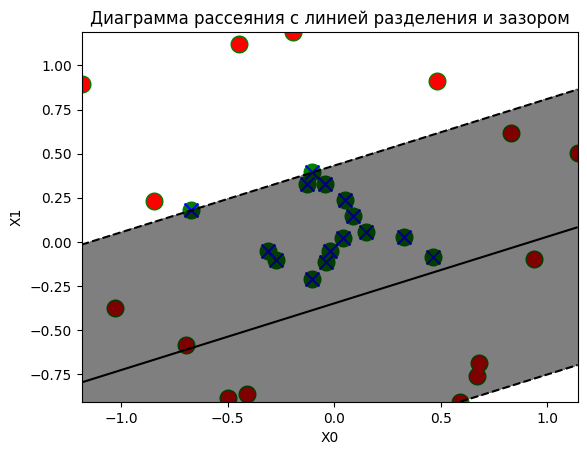

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
y_pred = svm_rbf.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

0.7

Poly ядро

In [ ]:
svm_rbf = svm.SVC(kernel='poly', degree = 2, C = 100).fit(X, y)

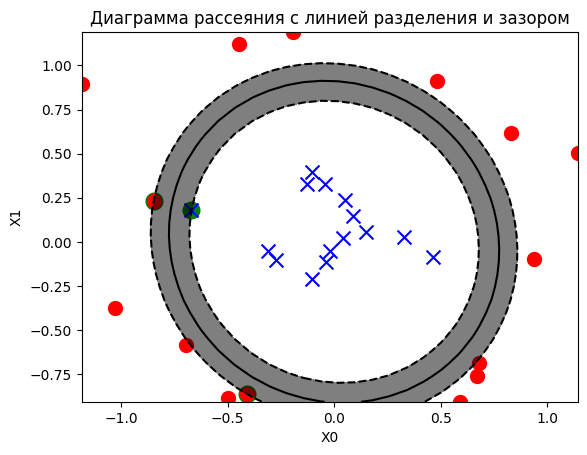

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
y_pred = svm_rbf.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

In [ ]:
svm_rbf = svm.SVC(kernel='poly', degree = 4, C = 1).fit(X, y)

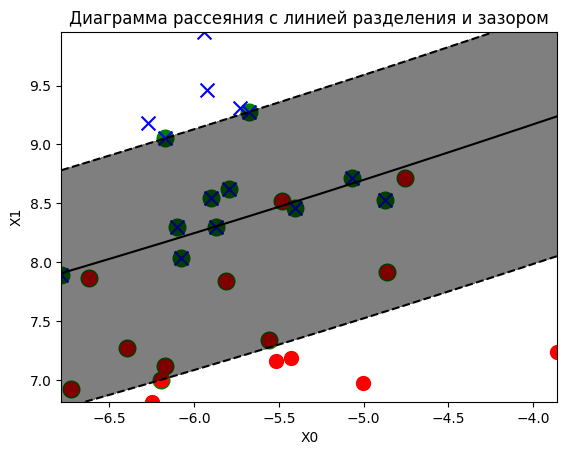

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
svm_rbf = svm.SVC(kernel='poly', degree = 4, C = 1000).fit(X, y)

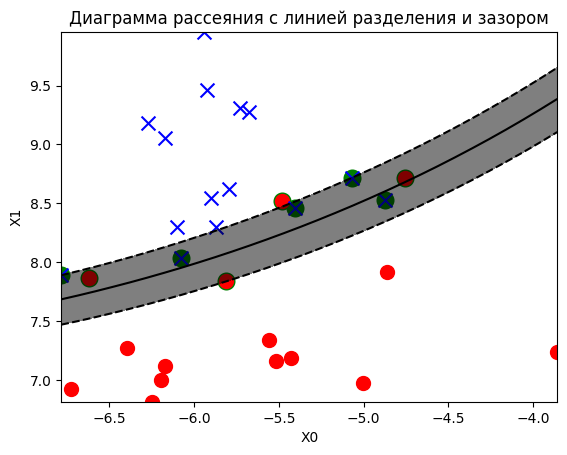

In [ ]:
plot_decision_regions(X, y, svm_rbf)

Болше С - жесткий зазор -> надежнее предсказание / большая чувствительность к выбросам

Меньше С - мягкий зазор -> возможны ошибки в зазоре / меньшая чувствительность к выбросам

5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

In [ ]:
from sklearn.svm import LinearSVC as LS

In [ ]:
svm_LS = LS().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
y_pred = svm_LS.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

0.8

Не очень хорошо, ведь такой тип не подходит для линейно неразделимых данных

6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [148]:
X = np.random.rand(1000, 5)
y = np.random.randint(0, 2, 1000)

Я использую случайную генерацию датасета, при повторном запуске он поменяется!!!

In [160]:
proba_liner = svm.SVC(kernel = 'linear', C = 1).fit(X, y)

In [161]:
y_pred = proba_liner.predict(X)
metrics.accuracy_score(y, y_pred)

0.527

С линейном ядром лучший результат - 0.527 при С = 1

In [177]:
proba_rbf = svm.SVC(kernel = 'rbf', C = 10000).fit(X, y)

In [178]:
y_pred = proba_rbf.predict(X)
metrics.accuracy_score(y, y_pred)

0.947

C rbf ядром лучший результат - 0.947 при С = 10000

In [191]:
proba_poly = svm.SVC(kernel = 'poly', degree = 4, C = 10).fit(X, y)

In [192]:
y_pred = proba_poly.predict(X)
metrics.accuracy_score(y, y_pred)

0.582

С poly ядром лучший результат - 0.582 при степени - 4, С = 10.
НО тут чем больше С тем лучше, ввиду особенностей poly - моделей Сolab не тянет 1000 точек и 5 признаков, так что пришлось ограничется этим(

Лучший вариант - rbf ядро, однако стоит понимать что при разбитии данных на тестувую и выборочную результат может стать хуже, в конце концов мы используем совершенно случайные данные, без настоящих зависимостей (В этом задании)

7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [193]:
X = np.random.rand(1000, 5)
y = np.random.randint(0, 2, 1000)

In [194]:
proba_rbf = svm.SVC(kernel = 'rbf', C = 10000).fit(X, y)

In [195]:
y_pred = proba_rbf.predict(X)
metrics.accuracy_score(y, y_pred)

0.966

Сложности начались уже на 1000 точек (говорим о модели с ядром rbf)
НО тут также играет роль С, которое у меня не маленькое, если его уменьшить в определенной пропорции можно будет добавлять колличество точек без изменения времени выполнения и затраты вычислительных ресурсов

8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

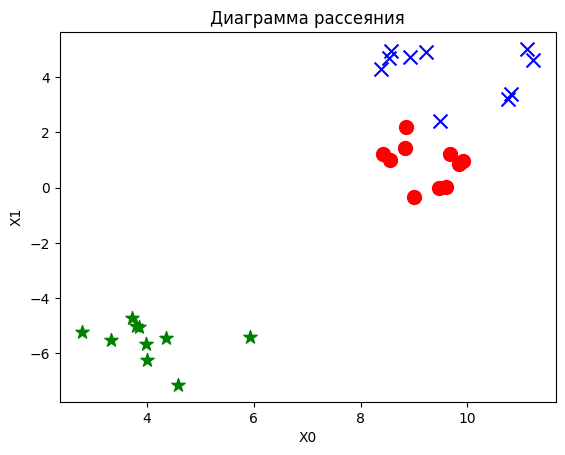

In [211]:
X, y = make_blobs(n_features=2, n_samples=30, centers=3, random_state=4, cluster_std=0.8)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], marker="*", c='g', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [209]:
model = svm.SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

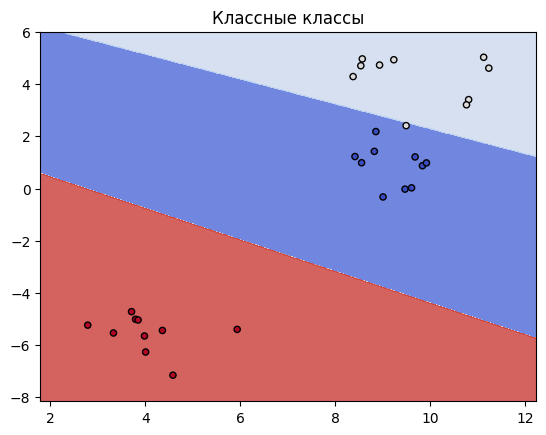

In [212]:

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Классные классы')
plt.show()

9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [213]:
from sklearn.datasets import make_blobs

In [223]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

model = svm.SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [220]:
print(y_test)

[0 2 0 0 2 1 2 0 2 1 2 1 2 2 1 2 2 1 1 0 0 2 0 0 1 1 1 2 0 1]


In [222]:
print(model.predict(X_test))

[0 2 0 0 2 1 2 0 2 1 2 1 2 2 1 2 2 1 1 0 0 2 0 0 1 1 1 2 0 1]


10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [227]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Load the boston dataset
boston = fetch_california_housing()
X = boston.data
y = boston.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Fit the linear regression model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)


R-squared: 0.5947275061211228


In [231]:
from sklearn.datasets import fetch_california_housing

boston = fetch_california_housing()
X = boston.data
y = boston.target

In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
svr = GridSearchCV(SVR(), param_grid)
svr.fit(X_train_scaled, y_train)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: {:.2f}".format(mse))
print("R^2: {:.2f}".format(r2))
